In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import cauchy

In [16]:
Q_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - (N + 1))/(N+1)) + x for i in range(1,N+1)])
Q_Normal = lambda mu,sigma,N : np.array([mu +sigma*(2**0.5)*erfinv((2*i - N - 1)/(N+1)) for i in range(1,N+1)])

In [73]:
dt,D = 0.1,0.1; N = 500
a = dt
# a=np.sqrt(6*D)
noise=D*(2*np.random.rand(N)-1)
Make_noise = lambda arr,D : arr + D*(2*np.random.rand(len(arr))-1)
A =Q_Lorentzian(0,1,N)

In [74]:
times = 50
A =Q_Lorentzian(0,1,N)
A_list = [np.zeros_like(A) for _ in range(times) ]
A_list[0] = A
for i,A_ in enumerate(A_list,1):
    if i !=times:
        print(i,end=' ')
        A_list[i] = Make_noise(A_,0.01)
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

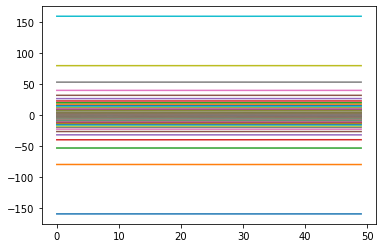

In [75]:
plt.plot(A_list);

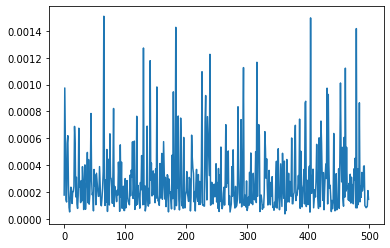

In [70]:
plt.plot(np.var(A_list,axis=0))

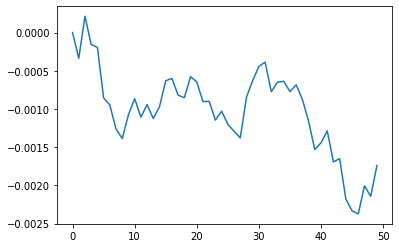

In [71]:
plt.plot(np.mean(A_list,axis=1))

In [72]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
from TO_sim.To_Draw import *
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

In [82]:

def Sim_Multi_mset_Noise(m,Noise):

    N  =  500
    K_start = 0.1
    K_end = 12.5
    dK = 0.2
    Ks = np.arange(K_start,K_end + dK,dK)
    # m = 0.95
    dtheta_init = np.zeros(N)
    t_end = 200
    dt = 0.1
    dist = "Quantile Lorentzian" 
    if dist == "Normal":
        theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
    elif dist == "Lorentzian":
        theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    elif dist == "Quantile Lorentzian":
        theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
        
    theta_dic = {}
    dtheta_dic = {}
    rs_dic = {}
    omega_dic = {}
    t_dic = {}

    num = 0
    for K in tqdm(Ks):
        if num == 0:
            omega =  Make_noise(omega_init,Noise)
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
        else:
            omega =  Make_noise(omega,Noise)
            theta =  Make_noise(theta_s[-1],Noise)
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta,p_dtheta=dtheta_dic[num-1][-1],
                                                        p_omega=omega,distribution="Normal")
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
        theta_dic[num] = theta_s
        dtheta_dic[num] = dtheta_s
        rs_dic[num] = rs
        omega_dic[num] = omega
        t_dic[num] = t + num*t_end
        num += 1
    theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

    theta_r_dic = {}
    dtheta_r_dic = {}
    rs_r_dic = {}
    omega_r_dic = {}
    t_r_dic = {}
    dKr = -0.2
    Ksr = np.arange(K_end,K_start + dKr,dKr)

    num_r = 0
    for K in tqdm(Ksr):
        if num_r == 0:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega,distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
        else:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                        p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
        theta_r_dic[num_r] = theta_s
        dtheta_r_dic[num_r] = dtheta_s
        rs_r_dic[num_r] = rs
        omega_r_dic[num_r] = omega
        t_r_dic[num_r] = t + num_r*t_end
        num_r += 1
        
        
    createFolder(f"Review2/Noise/Noise = {Noise}")
    Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name=f"Review2/Noise/Noise = {Noise}")


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

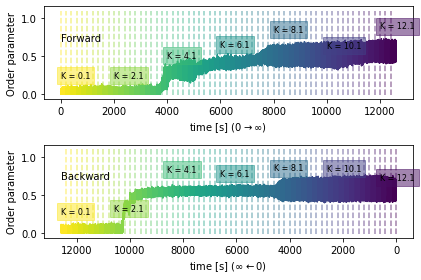

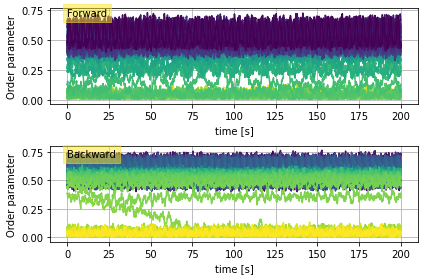

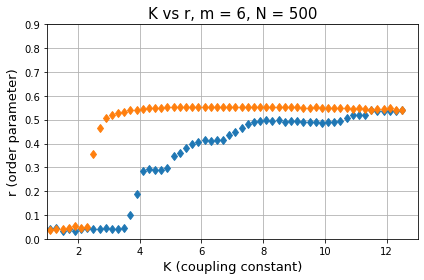

In [84]:
Sim_Multi_m(6,0.03)

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

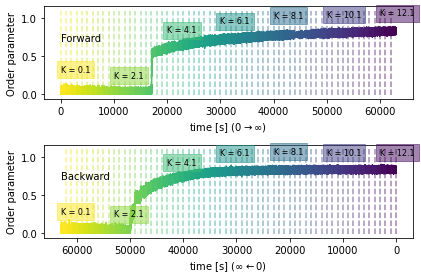

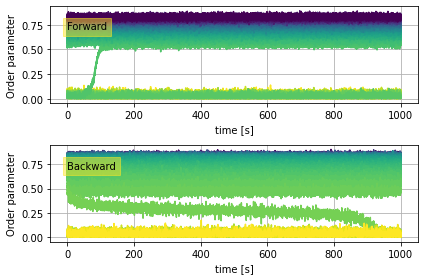

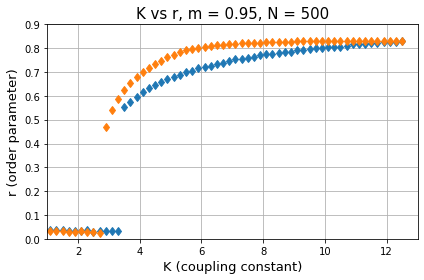

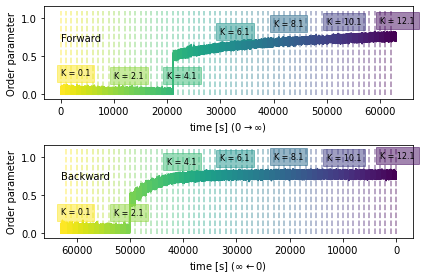

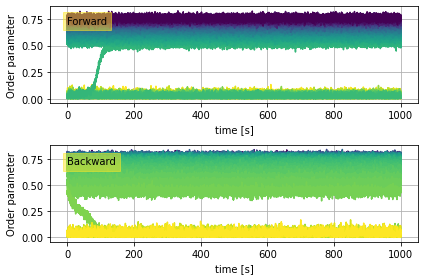

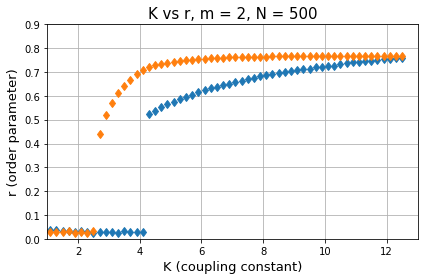

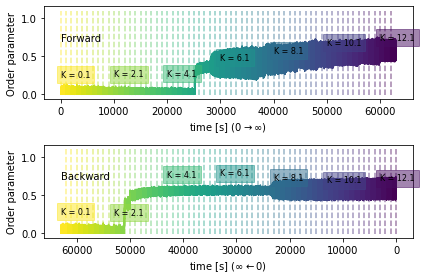

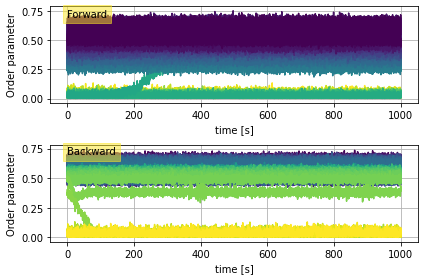

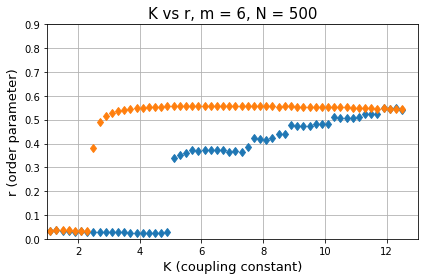

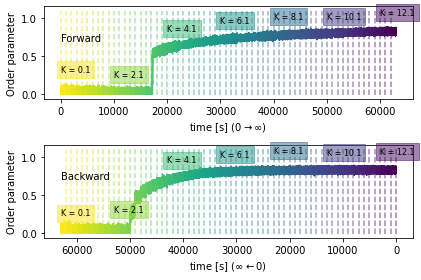

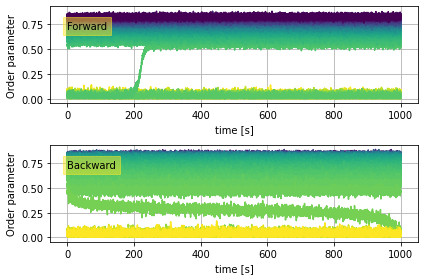

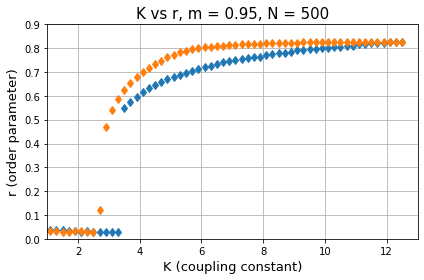

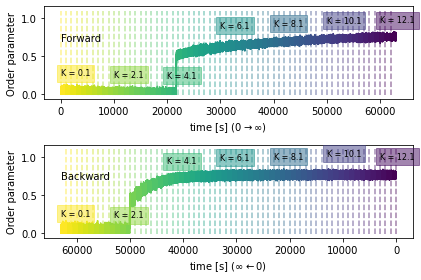

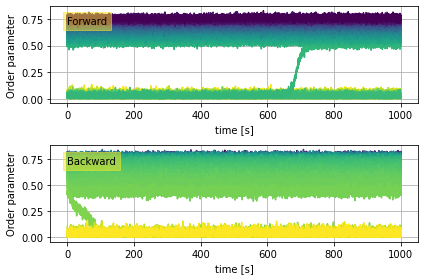

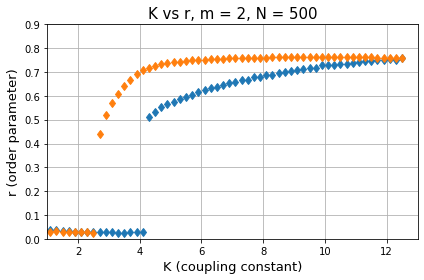

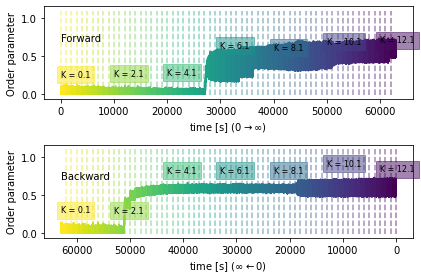

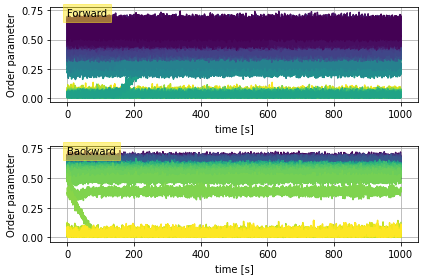

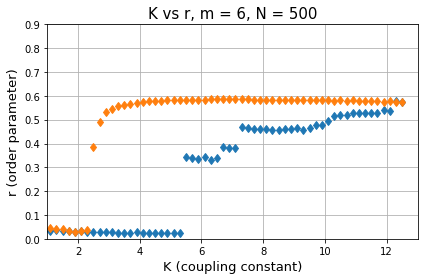

In [1]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise, Sim_Multi_mset_Noise
from TO_sim.Multi_m import Sim_Multi_mset_thetaNoise as theta_Noise
for Noise in [1e-5,1e-4]:
    theta_Noise(Noise)